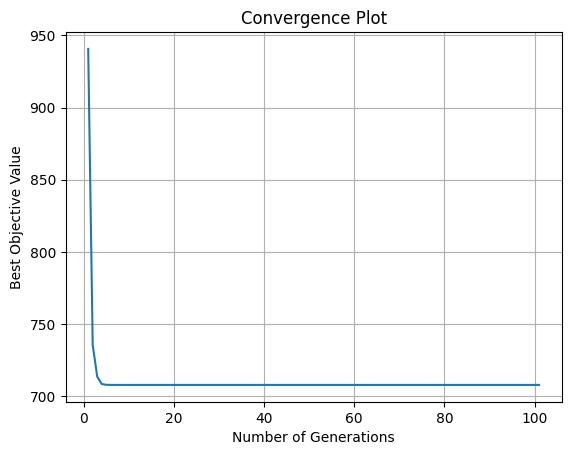

Toff: 55.60786647143142; Ton: 18.421490418542707; Sv: 55.09728701206723; Ip: 121.23127077674414
CE: 707.7179693504477


In [33]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd



vishnu = 6 # 0 for multi, 1 for KW and soo on 6 for CE single objective


c1 = 325.2581577858 # Example constant values
c2 = 1.522271657066
c3 = 21.6165
c4 = 37.7269
c5 = 513.2847
c6 = 1197.9836

def switch_vishnu(vishnu):
    switch_dict = {
        0: (1/6,1/6,1/6,1/6,1/6,1/6),
        1: (1, 0, 0, 0, 0, 0),
        2: (0, 1, 0, 0, 0, 0),
        3: (0, 0, 1, 0, 0, 0),
        4: (0, 0, 0, 1, 0, 0),
        5: (0, 0, 0, 0, 1, 0),
        6: (0, 0, 0, 0, 0, 1)
    }

    return switch_dict.get(vishnu, (0, 0, 0, 0, 0, 0))


def switch_case(vishnu):
    switch_dict = {
        1: 'KW',
        2: 'PCV',
        3: 'SR',
        4: 'ED',
        5: 'LE',
        6: 'CE'
    }

    return switch_dict.get(vishnu, '')
# Example usage:

w1, w2, w3, w4, w5, w6 = switch_vishnu(vishnu)

# Constants for TLBO
population_size = 50
num_generations = 100
learning_rate = 0.5

l_bounds = np.array([51, 5, 40, 70])
u_bounds = np.array([63, 25, 80, 150])


def initialize_population(population_size, bounds):
    return np.random.uniform(bounds[0], bounds[1], (population_size, len(bounds[0])))

def objective_function(x):
    if vishnu == 0:
      return objective_function_multi(x)
    else:
      return objective_function_single(x)

def objective_function_multi(x):
    Toff, Ton, Sv, Ip = x
    KW = 81 + 6.66*Toff + 0.19*Ton + 0.665*Sv + 0.311*Ip - 0.0522*Toff*Toff + 0.0002*Ton*Ton - 0.00044*Sv*Sv - 0.000293*Ip*Ip - 0.0060*Toff*Ton - 0.00346*Toff*Sv - 0.00413*Toff*Ip- 0.00025*Ton*Sv + 0.00727*Ton*Ip - 0.00132*Sv*Ip
    PCV = 29.8 - 0.942*Toff + 0.327*Ton - 0.1848*Sv + 0.0769*Ip + 0.00733*Toff*Toff + 0.00018*Ton*Ton + 0.000505*Sv*Sv + 0.000006*Ip*Ip - 0.00321*Toff*Ton + 0.002936*Toff*Sv - 0.001016*Toff*Ip - 0.002419*Ton*Sv + 0.000788*Ton*Ip - 0.000348*Sv*Ip
    SR = -55.7 + 1.97*Toff + 1.011*Ton + 0.223*Sv + 0.123*Ip - 0.0195*Toff*Toff - 0.00414*Ton*Ton - 0.00223*Sv*Sv - 0.000372*Ip*Ip - 0.00998*Toff*Ton + 0.00155*Toff*Sv - 0.00050*Toff*Ip - 0.00574*Ton*Sv + 0.003548*Ton*Ip - 0.000498*Sv*Ip
    ED = 56.3 - 1.93*Toff + 0.908*Ton + 0.575*Sv + 0.230*Ip + 0.0161*Toff*Toff + 0.00243*Ton*Ton - 0.00221*Sv*Sv - 0.000953*Ip*Ip - 0.00252*Toff*Ton - 0.00391*Toff*Sv + 0.00025*Toff*Ip - 0.00929*Ton*Sv + 0.001208*Ton*Ip - 0.000628*Sv*Ip
    LE= 213 + 2.5*Toff + 1.17*Ton + 0.35*Sv + 1.882*Ip + 0.018*Toff*Toff + 0.1621*Ton*Ton - 0.0034*Sv*Sv + 0.00035*Ip*Ip - 0.0413*Toff*Ton + 0.0088*Toff*Sv - 0.0246*Toff*Ip - 0.0017*Ton*Sv - 0.02156*Ton*Ip - 0.00285*Sv*Ip
    CE = 17673 - 578*Toff + 37.1*Ton - 20.4*Sv + 3.9*Ip + 4.83*Toff*Toff - 0.282*Ton*Ton - 0.032*Sv*Sv - 0.0235*Ip*Ip - 0.837*Toff*Ton + 0.476*Toff*Sv - 0.019*Toff*Ip - 0.194*Ton*Sv + 0.342*Ton*Ip - 0.0439*Sv*Ip

    # Calculate the objective value
    optimal =  w1 * KW / c1 - w2 * PCV / c2 + w3 * SR / c3 + w4 * ED / c4 + w5 * LE / c5 + w6 * CE / c6

    return optimal

def objective_function_single(x):
    Toff, Ton, Sv, Ip = x
    KW = 81 + 6.66*Toff + 0.19*Ton + 0.665*Sv + 0.311*Ip - 0.0522*Toff*Toff + 0.0002*Ton*Ton - 0.00044*Sv*Sv - 0.000293*Ip*Ip - 0.0060*Toff*Ton - 0.00346*Toff*Sv - 0.00413*Toff*Ip- 0.00025*Ton*Sv + 0.00727*Ton*Ip - 0.00132*Sv*Ip
    PCV = 29.8 - 0.942*Toff + 0.327*Ton - 0.1848*Sv + 0.0769*Ip + 0.00733*Toff*Toff + 0.00018*Ton*Ton + 0.000505*Sv*Sv + 0.000006*Ip*Ip - 0.00321*Toff*Ton + 0.002936*Toff*Sv - 0.001016*Toff*Ip - 0.002419*Ton*Sv + 0.000788*Ton*Ip - 0.000348*Sv*Ip
    SR = -55.7 + 1.97*Toff + 1.011*Ton + 0.223*Sv + 0.123*Ip - 0.0195*Toff*Toff - 0.00414*Ton*Ton - 0.00223*Sv*Sv - 0.000372*Ip*Ip - 0.00998*Toff*Ton + 0.00155*Toff*Sv - 0.00050*Toff*Ip - 0.00574*Ton*Sv + 0.003548*Ton*Ip - 0.000498*Sv*Ip
    ED = 56.3 - 1.93*Toff + 0.908*Ton + 0.575*Sv + 0.230*Ip + 0.0161*Toff*Toff + 0.00243*Ton*Ton - 0.00221*Sv*Sv - 0.000953*Ip*Ip - 0.00252*Toff*Ton - 0.00391*Toff*Sv + 0.00025*Toff*Ip - 0.00929*Ton*Sv + 0.001208*Ton*Ip - 0.000628*Sv*Ip
    LE= 213 + 2.5*Toff + 1.17*Ton + 0.35*Sv + 1.882*Ip + 0.018*Toff*Toff + 0.1621*Ton*Ton - 0.0034*Sv*Sv + 0.00035*Ip*Ip - 0.0413*Toff*Ton + 0.0088*Toff*Sv - 0.0246*Toff*Ip - 0.0017*Ton*Sv - 0.02156*Ton*Ip - 0.00285*Sv*Ip
    CE = 17673 - 578*Toff + 37.1*Ton - 20.4*Sv + 3.9*Ip + 4.83*Toff*Toff - 0.282*Ton*Ton - 0.032*Sv*Sv - 0.0235*Ip*Ip - 0.837*Toff*Ton + 0.476*Toff*Sv - 0.019*Toff*Ip - 0.194*Ton*Sv + 0.342*Ton*Ip - 0.0439*Sv*Ip

    # Calculate the objective value
    optimal =  w1 * KW - w2 * PCV + w3 * SR + w4 * ED + w5 * LE + w6 * CE
    return optimal


def teacher_phase(population, objectives):
    best_index = np.argmax(objectives)
    teacher_solution = population[best_index]
    mean_solution = np.mean(population, axis=0)
    for i in range(len(population)):
        population[i] += learning_rate * (teacher_solution - population[i]) + learning_rate * (mean_solution - population[i])
        population[i] = np.clip(population[i], l_bounds, u_bounds)
    new_objectives = np.array([objective_function(x) for x in population])
    return population, new_objectives

def learner_phase(population, objectives):
    for i in range(len(population)):
        j, k = np.random.choice(len(population), 2, replace=False)
        if objectives[j] > objectives[k]:
            better_solution = population[j]
        else:
            better_solution = population[k]
        population[i] += learning_rate * (better_solution - population[i])
        population[i] = np.clip(population[i], l_bounds, u_bounds)
    new_objectives = np.array([objective_function(x) for x in population])
    return population, new_objectives

def run_tlbo():
    bounds = (l_bounds, u_bounds)
    population = initialize_population(population_size, bounds)
    objectives = np.array([objective_function(x) for x in population])

    best_solution = population[np.argmax(objectives)]  # Initialize best_solution with the initial population
    best_objective = np.max(objectives)  # Initialize best_objective with the maximum initial objective value
    best_objective_history = [best_objective]

    for _ in range(num_generations):
        population, objectives = teacher_phase(population, objectives)
        population, objectives = learner_phase(population, objectives)

        best_index = np.argmax(objectives)
        if objectives[best_index] < best_objective:
            best_solution = population[best_index]
            best_objective = objectives[best_index]

        best_objective_history.append(best_objective)

    return best_solution, best_objective, best_objective_history

best_solution, best_objective, best_objective_history = run_tlbo()

# Plot the best objective value over generations
plt.plot(range(1, num_generations + 2), best_objective_history)
plt.xlabel('Number of Generations')
plt.ylabel('Best Objective Value')
plt.title('Convergence Plot')
plt.grid(True)
plt.show()


if vishnu == 0:
    # Save the results to an Excel file
    results_df = pd.DataFrame({
         'Iteration': range(1, num_generations + 2),
         'Best_Objective_Value': best_objective_history})
    results_df.to_excel('TLBO_plot_multiobjective.xlsx', index=False)

    Toff = best_solution[0]
    Ton = best_solution[1]
    Sv = best_solution[2]
    Ip = best_solution[3]
    KW = 81 + 6.66*Toff + 0.19*Ton + 0.665*Sv + 0.311*Ip - 0.0522*Toff*Toff + 0.0002*Ton*Ton - 0.00044*Sv*Sv - 0.000293*Ip*Ip - 0.0060*Toff*Ton - 0.00346*Toff*Sv - 0.00413*Toff*Ip- 0.00025*Ton*Sv + 0.00727*Ton*Ip - 0.00132*Sv*Ip
    PCV = 29.8 - 0.942*Toff + 0.327*Ton - 0.1848*Sv + 0.0769*Ip + 0.00733*Toff*Toff + 0.00018*Ton*Ton + 0.000505*Sv*Sv + 0.000006*Ip*Ip - 0.00321*Toff*Ton + 0.002936*Toff*Sv - 0.001016*Toff*Ip - 0.002419*Ton*Sv + 0.000788*Ton*Ip - 0.000348*Sv*Ip
    SR = -55.7 + 1.97*Toff + 1.011*Ton + 0.223*Sv + 0.123*Ip - 0.0195*Toff*Toff - 0.00414*Ton*Ton - 0.00223*Sv*Sv - 0.000372*Ip*Ip - 0.00998*Toff*Ton + 0.00155*Toff*Sv - 0.00050*Toff*Ip - 0.00574*Ton*Sv + 0.003548*Ton*Ip - 0.000498*Sv*Ip
    ED = 56.3 - 1.93*Toff + 0.908*Ton + 0.575*Sv + 0.230*Ip + 0.0161*Toff*Toff + 0.00243*Ton*Ton - 0.00221*Sv*Sv - 0.000953*Ip*Ip - 0.00252*Toff*Ton - 0.00391*Toff*Sv + 0.00025*Toff*Ip - 0.00929*Ton*Sv + 0.001208*Ton*Ip - 0.000628*Sv*Ip
    LE= 213 + 2.5*Toff + 1.17*Ton + 0.35*Sv + 1.882*Ip + 0.018*Toff*Toff + 0.1621*Ton*Ton - 0.0034*Sv*Sv + 0.00035*Ip*Ip - 0.0413*Toff*Ton + 0.0088*Toff*Sv - 0.0246*Toff*Ip - 0.0017*Ton*Sv - 0.02156*Ton*Ip - 0.00285*Sv*Ip
    CE = 17673 - 578*Toff + 37.1*Ton - 20.4*Sv + 3.9*Ip + 4.83*Toff*Toff - 0.282*Ton*Ton - 0.032*Sv*Sv - 0.0235*Ip*Ip - 0.837*Toff*Ton + 0.476*Toff*Sv - 0.019*Toff*Ip - 0.194*Ton*Sv + 0.342*Ton*Ip - 0.0439*Sv*Ip
# Print the best solution and its optimal value
    print("Toff:", best_solution[0], end="; ")
    print("Ton:", best_solution[1], end="; ")
    print("Sv:", best_solution[2], end="; ")
    print("Ip:", best_solution[3])

    print("KW:", KW, end="; ")
    print("PCV:", PCV, end="; ")
    print("SR:", SR, end="; ")
    print("ED:", ED,end="; ")
    print("LE:", LE, end="; ")
    print("CE:", CE)

    print("Best Optimal(Z):", best_objective)
    printed_values_df = pd.DataFrame({ 'Variable': ['Toff', 'Ton', 'Sv', 'Ip', 'KW', 'PCV', 'SR', 'ED', 'LE', 'CE', 'Best Optimal(Z)'],'Value': [best_solution[0], best_solution[1], best_solution[2], best_solution[3], KW, PCV, SR, ED, LE, CE, best_objective]})
    printed_values_df.to_excel('/content/TLBO_multiobjective_values.xlsx', index=False)
else:
    switch_var = switch_case(vishnu)

    results_df = pd.DataFrame({
         'Iteration': range(1, num_generations + 2),
         'Best_Objective_Value': best_objective_history})
    results_df.to_excel('TLBO_plot_' + switch_var +'.xlsx', index=False)

    # Print values for single-objective optimization
    Toff = best_solution[0]
    Ton = best_solution[1]
    Sv = best_solution[2]
    Ip = best_solution[3]
    print("Toff:", best_solution[0], end="; ")
    print("Ton:", best_solution[1], end="; ")
    print("Sv:", best_solution[2], end="; ")
    print("Ip:", best_solution[3])
    print(switch_var+':', best_objective)
    printed_values_df = pd.DataFrame({
    'Variable': ['Toff', 'Ton', 'Sv', 'Ip', switch_var ],
    'Value': [best_solution[0], best_solution[1], best_solution[2], best_solution[3], best_objective]})
    printed_values_df.to_excel('TLBO_singleobjective_'+switch_var+ '.xlsx', index=False)
